<a href="https://colab.research.google.com/github/shubham12595/Hobby_Projects/blob/master/StockPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Price Prediction using Artificial Recurrent Neural Network called Long Short Term Memory(LSTM). We are going to predict the closing Stock Price of Apple Inc. using the 60 days stock price.

Advantages of LSTM are it has a feeback path associated with it. It can not only process images but also sequences of data such as speech or video.


LSTM mainly used for sequence predicction probles and have proven to be extremly predictive because it can save information which is important and can reject information which is not important.

In [0]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [4]:
#Get the stock quote
#APPLE INC Stock Information
df = web.DataReader('AAPL', data_source=  'yahoo', start= '2012-01-01', end = '2019-12-20')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-16,280.790009,276.980011,277.000000,279.859985,32046500.0,278.443604
2019-12-17,281.769989,278.799988,279.570007,280.410004,28539600.0,278.990875
2019-12-18,281.899994,279.119995,279.799988,279.739990,29007100.0,278.324249


In [5]:
# Ge the number of rows and columns
df.shape

(2006, 6)

Text(0, 0.5, 'Close Price in $')

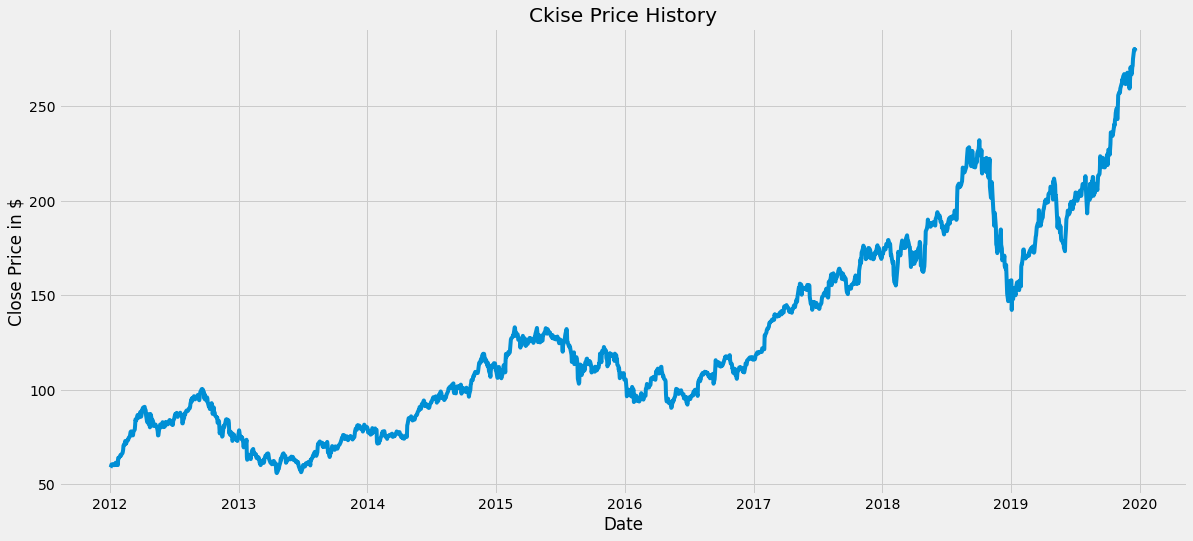

In [6]:
# TO visualise the closing price history


plt.figure(figsize= (18,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel('Close Price in $')

In [9]:
df1 = web.DataReader('AMZN', data_source=  'yahoo', start= '2012-01-01', end = '2019-12-20')
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2019-12-16,1769.500000,1757.050049,1767.000000,1769.209961,3145200,1769.209961
2019-12-17,1792.000000,1777.390015,1778.010010,1790.660034,3644400,1790.660034
2019-12-18,1798.199951,1782.359985,1795.020020,1784.030029,3351400,1784.030029


Text(0, 0.5, 'Close Price in $')

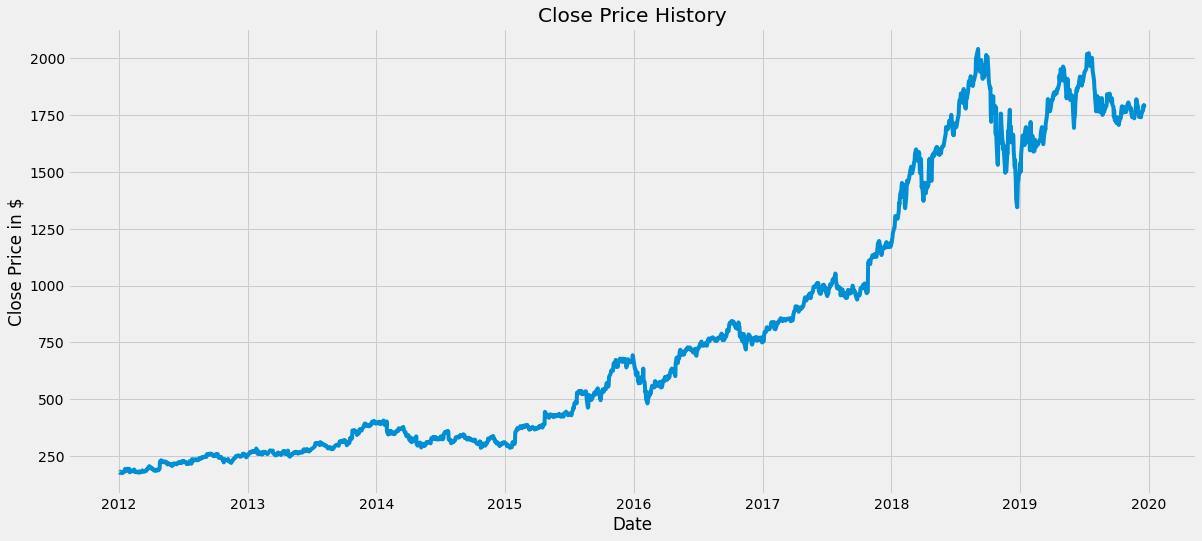

In [11]:

#AMAZON Closing Price History
plt.figure(figsize= (18,8))
plt.title('Close Price History')
plt.plot(df1['Close'])
plt.xlabel("Date")
plt.ylabel('Close Price in $')

In [23]:
data = df.filter(['Close'])
dataval = data.values
trainlen = int(len(dataval)*0.80)
trainlen

1604

In [24]:
data

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-16,279.859985
2019-12-17,280.410004
2019-12-18,279.739990


In [25]:
#Data needs to be preprocessed. Hence some scaling tehniques can be used. I will be using Min-Max Scaler
scale = MinMaxScaler(feature_range= (0,1))
scaledata = scale.fit_transform(dataval)
scaledata

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.99701712],
       [0.99826367],
       [0.99568159]])

In [33]:
#Creating the Training Dataset
#Split dtaset into x_train and y_train dataset

traindata = scaledata[0:trainlen,:]
xtrain = []
ytrain = []
for i in range(60, len(traindata)):
  xtrain.append(traindata[i-60:i,0])
  ytrain.append(traindata[i,0])
  if i<=61:
    print(xtrain)
    print(ytrain)
    print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [36]:
#Converting both the xtrain and the ytrain so that we can train a LSTM model

xtrain,ytrain = np.array(xtrain), np.array(ytrain)
xtrain

array([[0.01316509, 0.01457064, 0.01748985, ..., 0.13766105, 0.14243103,
        0.14442805],
       [0.01457064, 0.01748985, 0.02026915, ..., 0.14243103, 0.14442805,
        0.13949272],
       [0.01748985, 0.02026915, 0.01984303, ..., 0.14442805, 0.13949272,
        0.13293563],
       ...,
       [0.51927696, 0.51669488, 0.51322235, ..., 0.59767603, 0.5912207 ,
        0.58926183],
       [0.51669488, 0.51322235, 0.51958863, ..., 0.5912207 , 0.58926183,
        0.58164901],
       [0.51322235, 0.51958863, 0.53294452, ..., 0.58926183, 0.58164901,
        0.58939538]])

In [39]:
#Aftering Rehaping
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(1544, 60, 1)

In [0]:
#Building the LST model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (xtrain.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [47]:
#Compiling the model 
model.compile(optimizer = "Adam", loss = 'mean_squared_error')
model.fit(xtrain,ytrain, batch_size= 1, epochs= 1)

Epoch 1/1
1544/1544 [==============================] - 68s 44ms/step - loss: 7.9565e-04


In [0]:
#Ceating the testing Dataset
# We need to create new array which has testing values from index 1604 to 2006

testdata = scaledata[trainlen - 60:, :]
#Creating dataset xtest and ytest
xtest = []
ytest = data[trainlen:]

for i in range(60,len(testdata)):
  xtest.append(testdata[i-60:i,0])


In [54]:
#convert the data to a numpy array..
xtest = np.array(xtest)

#after reshaping
xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
xtest.shape


(402, 60, 1)

In [0]:
# Get the predictions

prediction = model.predict(xtest)
prediction = scale.inverse_transform(prediction)
prediction

In [59]:
#Get the root mean square error
rmsval = np.sqrt(np.mean((prediction-ytest)**2))
rmsval

Close    13.597084
dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


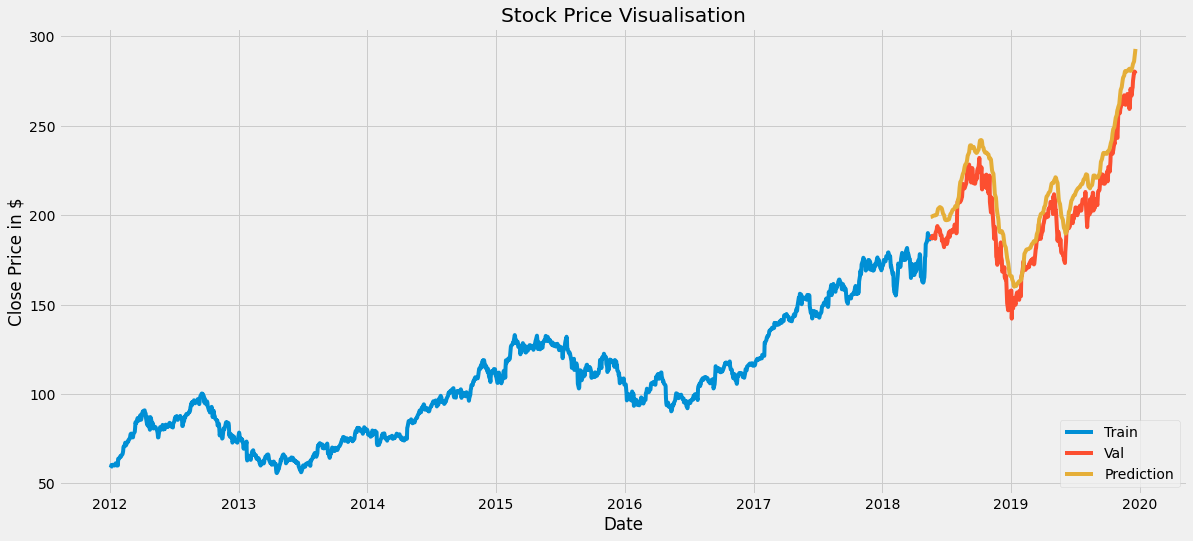

In [61]:
#Plotting the data

traingr = data[:trainlen]
valid = data[trainlen:]
valid['Predictions'] = prediction
plt.figure(figsize= (18,8))
plt.title('Stock Price Visualisation')
plt.xlabel('Date')
plt.ylabel('Close Price in $')
plt.plot(traingr['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Prediction'], loc = 'lower right')
plt.show()

In [62]:
valid

,Close,Predictions
Date,,
2018-05-18,186.309998,199.077591
2018-05-21,187.630005,199.176285
2018-05-22,187.160004,199.286301
2018-05-23,188.360001,199.335556
2018-05-24,188.149994,199.499359
...,...,...
2019-12-16,279.859985,286.000214
2019-12-17,280.410004,287.890411
2019-12-18,279.739990,289.875031


In [68]:
#Getting the quote for the next day 

quote = web.DataReader('AAPL', data_source=  'yahoo', start= '2012-01-01', end = '2019-12-23')
newdf = quote.filter(['Close'])
last60days = newdf[-60:].values
lastscaled = scale.transform(last60days)
x =[]

x.append(lastscaled)
x = np.array(x)
x = np.reshape(x , (x.shape[0],x.shape[1],1))
pred = model.predict(x)
pred = scale.inverse_transform(pred)
print(pred)

[[295.38242]]


In [72]:
quote = web.DataReader('AAPL', data_source=  'yahoo', start= '2019-12-24', end = '2019-12-24')
quote['Close']

Date
2019-12-24    284.269989
Name: Close, dtype: float64